<font size="5">**Tech Layoff Data Analysis**

<font size="2" font = 'Arial'>From Amazon, Microsoft, Google to Wayfair, the technology industry is currently shaken by massive layoffs since mid-2022. This tabular dataset includes information on 450+ technology companies, including:
<font size="3" font = 'Arial'>
    1. Office locations affected by layoffs
    2. Current IPO status
    3. Reported layoff date
    4. % of the workforce impacted within each company, etc.
<font size="4" font = 'Arial'>**Key Tasks**
<font size="3" font = 'Arial'>
    1. Visualize current layoffs trends based on months
    2. Identify which locations are most impacted
    3. Whether IPO status affects severity of layoffs
    4. Industry with the most layoffs
    5. Company with the most layoffs
    6. Categorize industries based on keywords like 'data', 'health', 'finance' and find the total layoffs of each industry sector

**Import essential libraries**

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import data & perform data cleaning**

In [348]:
layoff = pd.read_csv('tech_layoffs.csv')
layoff.head(10)

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."
5,NextRoll,Unclear,3,7/8/2022,Marketing Tech,San Francisco,Business Insider,Private,NaN
6,Armis Security,25,4,12/8/2022,Cybersecurity,San Francisco,Calcalistech,Private,NaN
7,Foxtrot,26,4,9/23/2022,"food and beverage, e-commerce",Chicago,Chicago Business,Private,NaN
8,Headspace Health,50,4,12/14/2022,"telehealth, wellness",Los Angeles,Bloomberg,Private,NaN
9,RealSelf,11,5,7/21/2022,Beauty tech,Seattle,GeekWire,Private,NaN


<font size = 5>**Data clearning**

<font size = 5>**Cleaning the Nulls Prt 1** 

<font size = 2>Clean total_layoffs column as it contains "Unclear" as input for null values

In [349]:
#More than 37% of the data total_layoffs is null, indicated by the % of value 'Unclear'
#Dropping nulls would lead to significant loss of data
layoff.total_layoffs.value_counts()/len(layoff.total_layoffs)

Unclear    0.372188
100        0.034765
30         0.024540
40         0.022495
150        0.016360
120        0.014315
20         0.014315
50         0.014315
90         0.012270
60         0.012270
25         0.012270
80         0.012270
200        0.010225
70         0.010225
32         0.010225
140        0.010225
24         0.008180
400        0.008180
300        0.008180
250        0.006135
43         0.006135
170        0.006135
85         0.006135
59         0.006135
450        0.006135
104        0.006135
76         0.006135
180        0.006135
1000       0.006135
13         0.006135
750        0.006135
16         0.006135
23         0.006135
44         0.004090
72         0.004090
27         0.004090
55         0.004090
75         0.004090
350        0.004090
95         0.004090
54         0.004090
45         0.004090
800        0.004090
57         0.004090
33         0.004090
58         0.004090
220        0.004090
56         0.004090
63         0.004090
35         0.004090


In [350]:
#Visualize distribution of total_layoffs to determine whether missing values should be replaced by mean or median
total_layoff_no_unclear = layoff[layoff['total_layoffs'] != 'Unclear']
total_layoff_no_unclear['total_layoffs'] = total_layoff_no_unclear['total_layoffs'].astype(float)
total_layoff_no_unclear['total_layoffs'].describe()

<ipython-input-350-48aaabdaae29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_layoff_no_unclear['total_layoffs'] = total_layoff_no_unclear['total_layoffs'].astype(float)


count      307.000000
mean       450.019544
std       1652.123678
min          5.000000
25%         44.000000
50%         95.000000
75%        200.000000
max      18000.000000
Name: total_layoffs, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


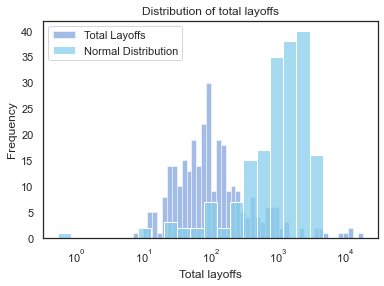

In [351]:
fig, ax = plt.subplots()
ax.hist(total_layoff_no_unclear['total_layoffs'], bins=np.logspace(np.log10(min(total_layoff_no_unclear['total_layoffs'])), np.log10(max(total_layoff_no_unclear['total_layoffs'])), 50), alpha=0.5,label='Total Layoffs')
ax.set_xscale('Log')
ax.set_xlabel('Total layoffs')
ax.set_ylabel('Count')
ax.set_title('Distribution of Total Layoffs')

# Generate random data with mean and standard deviation matching the given information
data = np.random.normal(450, 1652, 307)

# Plot histogram
sns.histplot(data, bins=20, kde=False, color='skyblue', edgecolor='white', label='Normal Distribution')

# Calculate normal distribution parameters based on the data
mu, std = data.mean(), data.std()

# Create range of x-axis values for the plot
x = np.linspace(data.min(), data.max(), 1000)

# Calculate normal distribution values for the x-axis range
y = 1/(std * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * std**2))


# Set axis labels and title
plt.xlabel('Total layoffs')
plt.ylabel('Frequency')
plt.title('Distribution of total layoffs')
plt.legend()
plt.show(block = True)

If the normal distribution histogram is on the right side of the chart and the original data distribution of total-layoffs is on the left side of the chart, it suggests that the distribution of the data is skewed to the right. 

This means that there are more data points with lower values and fewer data points with higher values, which causes the mean of the data to be greater than the median. It's worth noting that the shape of the normal distribution curve is symmetrical, so if the data were normally distributed, the histogram and the normal distribution curve would be centered around the same point. The fact that they are shifted to different sides suggests that the data is not normally distributed.

**Next step**

Impute missing values with the median: This is a robust strategy that is not sensitive to outliers.


In [352]:
# Calculate median of the column
median = total_layoff_no_unclear['total_layoffs'].median()

# Replace 'Unclear' with NaN
layoff['total_layoffs'] = layoff['total_layoffs'].replace('Unclear', np.nan)

# Replace NaN values with median
layoff['total_layoffs'] = layoff['total_layoffs'].fillna(median)

# Change datatype to float
layoff['total_layoffs'] = layoff['total_layoffs'].astype('float')

In [353]:
layoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company                        489 non-null    object 
 1   total_layoffs                  489 non-null    float64
 2   impacted_workforce_percentage  489 non-null    object 
 3   reported_date                  489 non-null    object 
 4   industry                       489 non-null    object 
 5   headquarter_location           489 non-null    object 
 6   sources                        489 non-null    object 
 7   status                         489 non-null    object 
 8   additional_notes               22 non-null     object 
dtypes: float64(1), object(8)
memory usage: 34.5+ KB


<font size = 5>**Cleaning the Nulls Prt 2**

<font size = 2>Perform the same cleaning for column 'impacted_workforce_percentage' as it contains 'Unclear' as well.
More than 27% of the data is null, dropping null values would lead to great loss in data.

In [354]:
layoff['impacted_workforce_percentage'].value_counts()/len(layoff['impacted_workforce_percentage'])

Unclear    0.271984
10         0.065440
20         0.059305
15         0.055215
100        0.053170
5          0.040900
25         0.034765
7          0.030675
33         0.026585
6          0.024540
8          0.024540
13         0.022495
30         0.020450
12         0.020450
11         0.020450
14         0.018405
9          0.018405
17         0.016360
3          0.016360
18         0.014315
19         0.014315
50         0.012270
21         0.010225
23         0.008180
4          0.008180
40         0.008180
35         0.008180
2          0.006135
27         0.006135
16         0.006135
24         0.006135
32         0.004090
46         0.004090
1          0.004090
22         0.004090
75         0.004090
37         0.004090
48         0.002045
42         0.002045
60         0.002045
34         0.002045
76         0.002045
26         0.002045
29         0.002045
28         0.002045
39         0.002045
43         0.002045
54         0.002045
70         0.002045
74         0.002045


In [355]:
#remove the 'Unclear' and visualize distribution
impacted_workforce_percentage_dropnulls = layoff[layoff['impacted_workforce_percentage'] != 'Unclear']['impacted_workforce_percentage'].astype(float)

In [356]:
impacted_workforce_percentage_dropnulls.describe()

count    356.000000
mean      23.876404
std       24.809390
min        1.000000
25%       10.000000
50%       15.000000
75%       25.000000
max      100.000000
Name: impacted_workforce_percentage, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


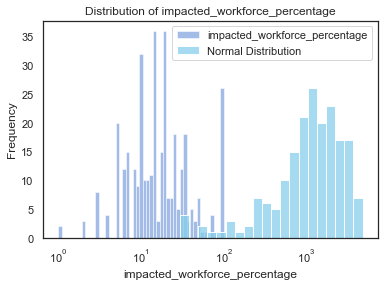

In [357]:
fig, ax = plt.subplots()
ax.hist(impacted_workforce_percentage_dropnulls, bins=np.logspace(np.log10(min(impacted_workforce_percentage_dropnulls)), np.log10(max(impacted_workforce_percentage_dropnulls)), 50), alpha=0.5,label='impacted_workforce_percentage')
ax.set_xscale('Log')
ax.set_xlabel('impacted_workforce_percentage')
ax.set_ylabel('Count')
ax.set_title('Distribution of impacted_workforce_percentage')

# Generate random data with mean and standard deviation matching the given information
data = np.random.normal(450, 1652, 307)

# Plot histogram
sns.histplot(data, bins=20, kde=False, color='skyblue', edgecolor='white', label='Normal Distribution')

# Calculate normal distribution parameters based on the data
mu, std = data.mean(), data.std()

# Create range of x-axis values for the plot
x = np.linspace(data.min(), data.max(), 1000)

# Calculate normal distribution values for the x-axis range
y = 1/(std * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * std**2))


# Set axis labels and title
plt.xlabel('impacted_workforce_percentage')
plt.ylabel('Frequency')
plt.title('Distribution of impacted_workforce_percentage')
plt.legend()
plt.show(block = True)

**Next step**

The data is not normally distributed, imputing missing values with the median: This is a robust strategy that is not sensitive to outliers.

In [358]:
# Calculate median of the column
median = impacted_workforce_percentage_dropnulls.median()

# Replace 'Unclear' with NaN
layoff['impacted_workforce_percentage'] = layoff['impacted_workforce_percentage'].replace('Unclear', np.nan)

# Replace NaN values with median
layoff['impacted_workforce_percentage'] = layoff['impacted_workforce_percentage'].fillna(median)

# Change datatype to float
layoff['impacted_workforce_percentage'] = layoff['impacted_workforce_percentage'].astype('float')

**Transform other columns to reasonable datatypes**

In [359]:
#Change datatype of reported_date from object to dataframe
layoff['reported_date'] = pd.to_datetime(layoff['reported_date'])

#Change datatype of multiple columns' datatype from object to categorical for better visualization
layoff['industry'] = layoff['industry'].astype('category')
layoff['headquarter_location'] = layoff['headquarter_location'].astype('category')
layoff['sources'] = layoff['sources'].astype('category')
layoff['company'] = layoff['company'].astype('category')
layoff['status'] = layoff['status'].astype('category')

#change notes column into string
layoff['additional_notes'] = layoff['additional_notes'].astype('string')

In [360]:
layoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company                        489 non-null    category      
 1   total_layoffs                  489 non-null    float64       
 2   impacted_workforce_percentage  489 non-null    float64       
 3   reported_date                  489 non-null    datetime64[ns]
 4   industry                       489 non-null    category      
 5   headquarter_location           489 non-null    category      
 6   sources                        489 non-null    category      
 7   status                         489 non-null    category      
 8   additional_notes               22 non-null     string        
dtypes: category(5), datetime64[ns](1), float64(2), string(1)
memory usage: 65.0 KB


<font size = 5>**Data Analysis**
    
<font size = 4>**Task 1: Visualize current layoffs trends based on months**

In [361]:
layoff_by_month = layoff.groupby(pd.Grouper(key='reported_date', freq='M'))['total_layoffs'].sum()
layoff_by_month

reported_date
2022-01-31       70.0
2022-02-28      168.0
2022-03-31      535.0
2022-04-30     6078.0
2022-05-31     3308.0
2022-06-30     5417.0
2022-07-31     8725.0
2022-08-31     9369.0
2022-09-30     4713.0
2022-10-31    11485.0
2022-11-30    29867.0
2022-12-31     6212.0
2023-01-31    69499.0
Freq: M, Name: total_layoffs, dtype: float64

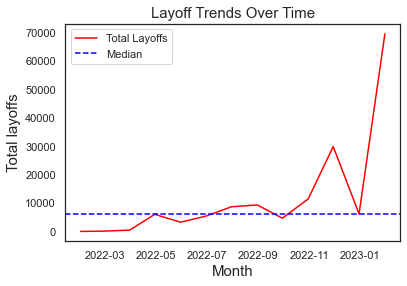

In [362]:
# Line chart
plt.plot(layoff_by_month.index, layoff_by_month.values, c = 'red', label = 'Total Layoffs')
plt.xlabel('Month', size = 15)
plt.ylabel('Total layoffs', size = 15)
plt.title('Layoff Trends Over Time', size = 15)

#add a median line
median_layoffs = np.median(layoff_by_month.values)
plt.axhline(median_layoffs, c='blue', ls='--', label='Median')
plt.legend()
plt.show()

Based on the reported data of total layoffs over time, it can be observed that there has been an overall upward trend in layoffs from March 2022 to October 2022, with some fluctuations. From October to December 2022, there was a sharp increase in total layoffs, followed by a significant drop in January 2023 to regular levels. 

However, starting from January 2023, there was a dramatic increase in layoffs, reaching a peak that was twice as high as the peak in November 2022 and 14 times higher than the median of total layoffs over time. It is important to note that the analysis assumes that the reported data is accurate and complete.

It is worth noting that the layoff trend observed may be attributed to various factors such as economic downturns, company performance, and global events. For instance, the significant increase in layoffs from October to December 2022 could be due to the holiday season, while the sharp decline in January 2023 could be linked to the end of year-end contracts. The subsequent spike in layoffs from January 2023 may indicate a more systemic issue affecting the tech industry as a whole. It is essential to investigate further to identify the root causes of these changes and to inform policy and decision-making.

<font size = 4>**Task 2: Identify which locations are most impacted**

In [363]:
# Clean the column by filling in missing state information for most of the rows
# Extract city and state information from headquarter_location
layoff['city'] = layoff['headquarter_location'].str.split(',').str[0].str.strip()
layoff['state'] = layoff['headquarter_location'].str.split(',').str[-1].str.strip()

# Find rows where state is missing
layoff['missing_state'] = layoff['state'] == layoff['city']

# Map missing states based on city
state_map = {
    'Los Angeles': 'CA',
    'Seattle': 'WA',
    'New York': 'NY',
    'San Francisco': 'CA',
    'Chicago': 'IL',
    'Mountain View': 'CA',
    'Pittsburgh': 'PA',
    'Boston': 'MA',
    'Miami': 'FL',
    'San Diego': 'CA',
    'Detroit': 'MI',
    'Atlanta': 'GA',
    'Austin': 'TX',
    'Distributed': '',
    'Boulder': 'CO',
    'San Mateo': 'CA',
    'San Franicsco': 'CA',
    'Greater New York area': 'NY',
    'Palo Alto': 'CA',
    'Indianapolis': 'IN',
    'Denver': 'CO',
    'Minneapolis': 'MN',
    'New York City': 'NY',
    'Culver City': 'CA',
    'Phoenix': 'AZ',
    'San Jose': 'CA',
    'Cincinnati': 'OH',
    'Reno': 'NV',
    'Portland': 'OR',
    'Stamford': 'CT',
    'Menlo Park': 'CA',
    'Salt Lake City': 'UT',
    'Dallas': 'TX',
    'Jersey City': 'NJ',
    'Columbus': 'OH',
    'Philadelphia': 'PA',
    'St. Louis': 'MO',
    'Milwaukee': 'WI',
    'Oakland': 'CA',
    'Houston': 'TX',
    'Long Beach': 'CA',
    'Santa Monica': 'CA',
    'Tempe': 'AZ',
    'Los Gatos': 'CA',
    'San Francsico': 'CA'
}

missing_state = layoff['missing_state']
layoff.loc[missing_state, 'state'] = layoff.loc[missing_state, 'city'].map(state_map)


In [364]:
layoff.state.value_counts()

CA                236
NY                 84
WA                 25
MA                 22
IL                 12
TX                 12
CO                  7
FL                  6
GA                  6
OH                  6
UT                  6
MI                  5
California          4
PA                  4
AZ                  3
DC                  3
OR                  3
MO                  3
CT                  3
Massachusetts       2
DE                  2
NE                  2
NV                  2
NJ                  2
MN                  2
NC                  2
MD                  2
WI                  1
ND                  1
VA                  1
Virginia            1
Sweden              1
North Carolina      1
KS                  1
SC                  1
TN                  1
Utah                1
New Jersey          1
IN                  1
VT                  1
                    1
Oregon              1
India               1
Canada              1
Name: state, dtype: int64

In [365]:
#fix all the states that are not shortname
def shortname(state):
    if state == 'California':
        return 'CA'
    elif state == 'Oregon':
        return 'OR'
    elif state == 'North Carolina':
        return 'NC'
    elif state == 'Utah':
        return 'UT'
    elif state == 'Virginia':
        return 'VA'
    elif state == 'New Jersey':
        return 'NJ'
    elif state == 'Massachusetts':
        return 'MA'
    else:
        return state

layoff['state'] = layoff['state'].apply(shortname)

In [366]:
# Create new column combining city and state with ", " in between if state is not null
layoff['location'] = layoff['city']
state_not_null = ~layoff['state'].isnull()
layoff.loc[state_not_null, 'location'] += ', ' + layoff['state']

# Drop the missing_state column
layoff.drop('missing_state', axis=1, inplace=True)

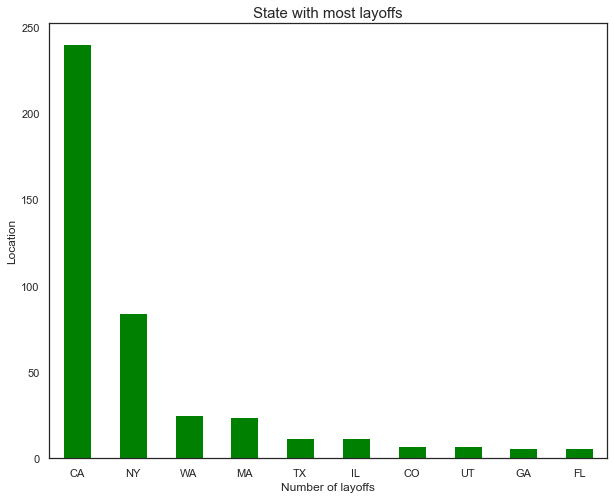

In [367]:
# Group the data by state and count the number of layoffs in each location, show top 10 state
location_counts = layoff.groupby('state').size().sort_values(ascending=False)[0:10]

# Plot a vertical bar chart of the location counts
plt.figure(figsize=(10,8))
location_counts.plot(kind='bar', color='green')
plt.xlabel('Number of layoffs')
plt.ylabel('Location')
plt.title('State with most layoffs', size = 15)
plt.xticks(rotation=0)
plt.show()

<font size = 4>**Task 3: Whether IPO status affects severity of layoffs**

In [368]:
# Group the data by IPO status and count the number of layoffs in each status
total_layoffs_ipo = layoff.groupby('status')['total_layoffs'].sum()

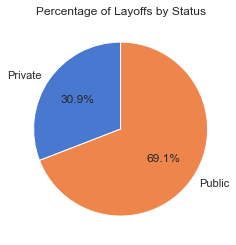

In [369]:
# Create pie chart
plt.pie(total_layoffs_ipo, labels=total_layoffs_ipo.index, autopct='%1.1f%%', startangle=90)

# Add title
plt.title('Percentage of Layoffs by Status')

# Show plot
plt.show()

In [370]:
total_lay_pub = layoff.groupby('status')['total_layoffs'].sum()['Public']
total_lay_pri = layoff.groupby('status')['total_layoffs'].sum()['Private']
times = total_lay_pub/total_lay_pri

In [371]:
print("Total layoffs of public company is {}, which is 69.1% of total layoffs and {:.3} more than total layoffs of private companies.".format(total_lay_pub,times))

Total layoffs of public company is 107455.0, which is 69.1% of total layoffs and 2.24 more than total layoffs of private companies.


<font size = 4> **Task 4: Top 15 Industry with the most layoffs**

In [372]:
total_lay_industry = layoff.groupby('industry').sum()['total_layoffs'].sort_values(ascending = False)[0:16]

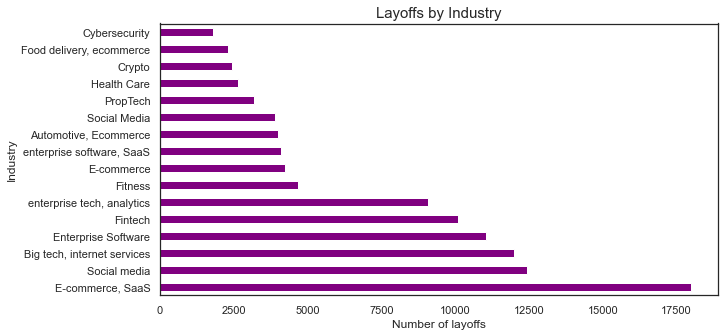

In [373]:
# Plot a horizontal bar chart of the location counts
plt.figure(figsize=(10,5))
total_lay_industry.plot(kind='barh', color='purple')
plt.xlabel('Number of layoffs')
plt.ylabel('Industry')
plt.title('Layoffs by Industry', size = 15)
plt.xticks(rotation=0)
plt.show()

<font size = 4> **Task 5: Top 10 Company with the most layoffs**

In [374]:
total_lay_company = layoff.groupby('company').sum()['total_layoffs'].sort_values(ascending = False)[0:11]

In [375]:
total_lay_company

company
Amazon        18000.0
Alphabet      12000.0
Meta          11000.0
Microsoft     10000.0
Salesforce     9090.0
Better.com     5000.0
Cisco          4100.0
Peloton        4084.0
Carvana        4000.0
Twitter        3740.0
Gopuff         2300.0
Name: total_layoffs, dtype: float64

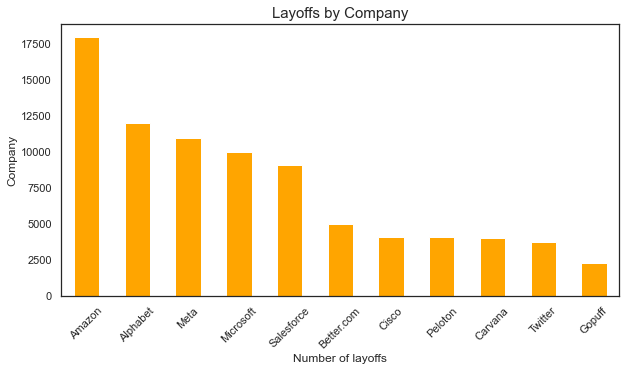

In [376]:
# Plot a vertical bar chart of the location counts
plt.figure(figsize=(10,5))
total_lay_company.plot(kind='bar', color='orange')
plt.xlabel('Number of layoffs', size = 12)
plt.ylabel('Company', size = 12)
plt.title('Layoffs by Company', size = 15)
plt.xticks(rotation=45)
plt.show()

<font size = 4> **Task 5: Layoffs for specific industries**

In [402]:
#Create a function to find sectors that belong to the industry
def find_data(industry_data, industry):
    data_industry = []
    for sector in industry_data:
        if industry in sector and sector not in data_industry:
            data_industry.append(sector)
    return data_industry

In [458]:
#Example of using the function to find a list of industries associated with specific key words
industry = 'food'
data_industry = find_data(layoff.industry,industry)
data_industry

['food and beverage, e-commerce',
 'AgTech, food and beverage',
 'food and beverage',
 'food and beverage, restaurants']

In [459]:
#find the total layoffs of a specific industry
def data_industry_cnt(data, data_industry):
    total_layoff = 0 
    for industry in data.industry:
        if industry in data_industry:
            total_layoff+= data.total_layoffs
    return total_layoff.sum()

In [455]:
#Example of using the function in finding total layoffs that of a industry
data_industry_cnt(layoff,data_industry)

1088122.0

In [456]:
#Put together 2 previous functions into a final function that show total number of layoffs for industry with specific keywords
def industry_layoff(data, keywords):
    industry_layoff = {}
    for keyword in keywords:
        data_industry = find_data(data.industry, keyword)
        total_layoff = data_industry_cnt(data, data_industry)
        industry_layoff[keyword] = total_layoff
    return industry_layoff

In [465]:
keywords = ['health','data','insurance','car','retail','food', 'finance']
industries_layoff = industry_layoff(layoff, keywords)
industries_layoff

{'health': 2953474.0,
 'data': 1088122.0,
 'insurance': 155446.0,
 'car': 3108920.0,
 'retail': 1088122.0,
 'food': 621784.0,
 'finance': 310892.0}

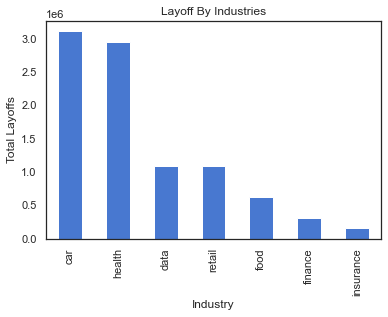

In [466]:
# Convert dictionary to pandas Series
s = pd.Series(industries_layoff).sort_values(ascending = False)

# Create bar chart
s.plot(kind ='bar')

# Add labels and title
plt.xlabel('Industry')
plt.ylabel('Total Layoffs')
plt.title('Layoff By Industries')

# Show chart
plt.show()